## Analysis of Popcorn Popping Success dataset
Accessed on May 8, 2020 at: https://vincentarelbundock.github.io/Rdatasets/datasets.html     

### Question: Was there a signficant difference between the number of unpopped kernels between Orville and Seaway brand popcorn? 

In [308]:
# Import pandas, numpy, stats & seaborn
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# Read in dataset & print first five rows
# pd.read_csv() assumes that dataset has a header
df = pd.read_csv('popcorn.csv')
df.head()

,Unnamed: 0,Unpopped,Brand,Trial
0,1,26,Orville,1
1,2,35,Orville,2
2,3,18,Orville,3
3,4,14,Orville,4
4,5,8,Orville,5


In [309]:
# Drop unnamed column and print first five rows of new versions
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Unpopped,Brand,Trial
0,26,Orville,1
1,35,Orville,2
2,18,Orville,3
3,14,Orville,4
4,8,Orville,5


In [310]:
# Print data types
df.dtypes

Unpopped     int64
Brand       object
Trial        int64
dtype: object

In [311]:
# Print summary of data
# Add "include='all'" to include non-numerical variables
df.describe(include="all")

,Unpopped,Brand,Trial
count,12.000000,12,12.000000
unique,NaN,2,NaN
top,NaN,Seaway,NaN
freq,NaN,6,NaN
mean,25.583333,NaN,3.500000
std,14.292136,NaN,1.783765
min,6.000000,NaN,1.000000
25%,14.000000,NaN,2.000000
50%,23.500000,NaN,3.500000
75%,35.500000,NaN,5.000000


In [312]:
# Print concise summary of df
# "verbose=True" prints full summary with info on all columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Unpopped  12 non-null     int64 
 1   Brand     12 non-null     object
 2   Trial     12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


In [313]:
# Count number of trials for each brand
brand_counts = df["Brand"].value_counts()
print(brand_counts)

Seaway     6
Orville    6
Name: Brand, dtype: int64


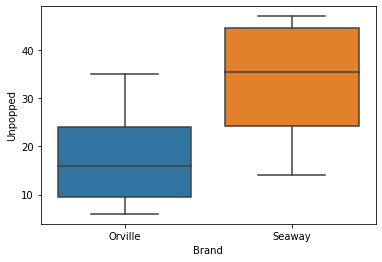

In [314]:
# Plot the number of unpopped kernals by brand
sns.boxplot(x= "Brand", y="Unpopped", data=df)

In [315]:
# Group the dataset by brand and compare mean number of unpopped kernals
df_test = df[["Unpopped", "Brand"]]
df_grp = df_test.groupby(['Brand']).mean()
df_grp

,Unpopped
Brand,
Orville,17.833333
Seaway,33.333333


In [316]:
df_anova = df[['Unpopped', 'Brand']]
grouped_anova = df_anova.groupby(['Brand'])
anova_results_1=stats.f_oneway(grouped_anova.get_group("Orville")["Unpopped"], grouped_anova.get_group("Seaway")["Unpopped"])
print(anova_results_1)

F_onewayResult(statistic=4.722616577481711, pvalue=0.05487636331577507)


### Conclusion
While Seaway had a higher mean number of unpopped kernals (33) than Orville (18) in this sample, there was no significant effect of brand on number of unpopped kernals (F(1,11) = 4.72, p > 0.05). 
